<a href="https://colab.research.google.com/github/yzhu233/MAT421/blob/main/ModuleH_Yaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.1 ODE Initial Value Problem Statement

Differential equation is a relationship between a function, f(x), its independent variable, x
, and any number of its derivatives. An ordinary differential equation or ODE is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension.
 
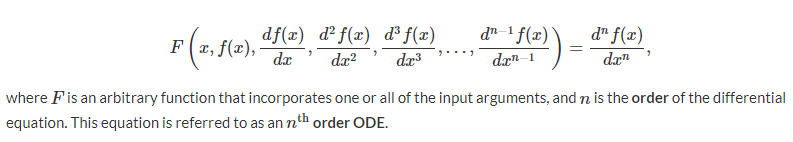

22.2 Reduction of Order

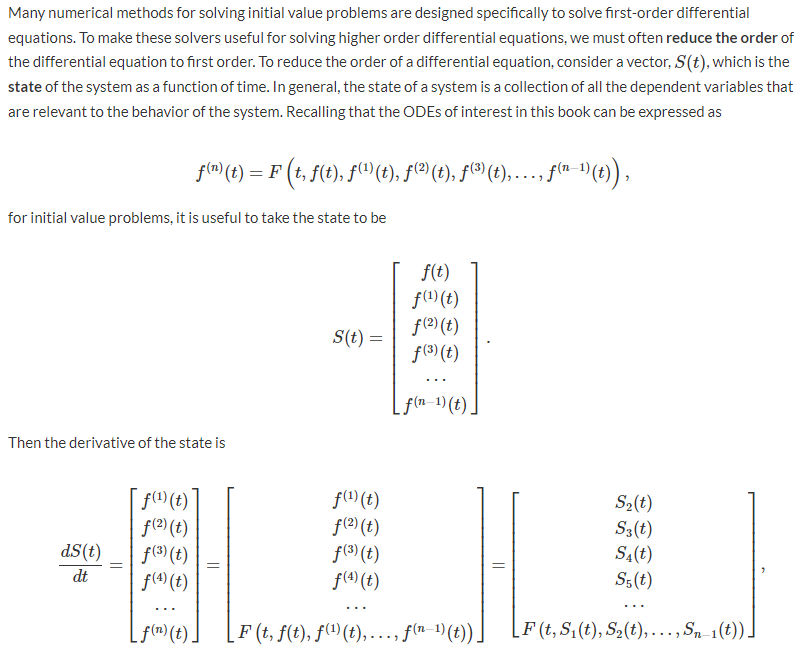

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def f(t, y):
    y1, y2 = y
    return [y2, -2*y2/t + 2*y1/t**2]

t_span = [1, 2] 
y0 = [1, 0]  
sol = solve_ivp(f, t_span, y0)

print(sol.y)


[[1.00000000e+00 1.00000025e+00 1.00002997e+00 1.00286161e+00
  1.06571860e+00 1.23474891e+00 1.41668018e+00]
 [0.00000000e+00 9.98003826e-04 1.08693494e-02 9.96413238e-02
  3.66658688e-01 5.24435431e-01 5.83328096e-01]]


22.3 The Euler Method

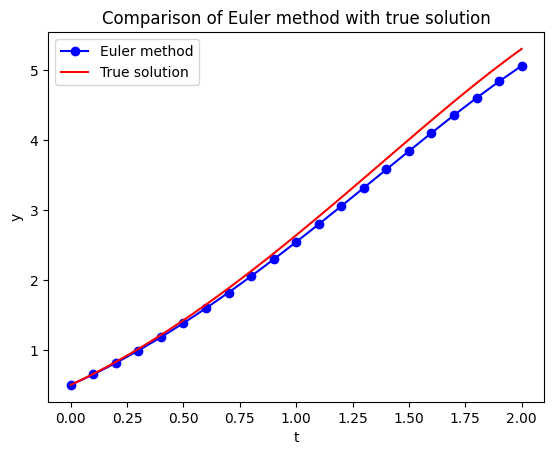

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return y - t**2 + 1

def true_solution(t):
    return (t + 1)**2 - 0.5*np.exp(t)

def euler(f, t0, y0, h, n):
    t = [t0]
    y = [y0]
    for i in range(n):
        y_next = y[-1] + h * f(t[-1], y[-1])
        y.append(y_next)
        t.append(t[-1] + h)
    return t, y

t0 = 0
y0 = 0.5
h = 0.1
n = 20
t, y = euler(f, t0, y0, h, n)
t_true = np.linspace(t0, t0 + n*h, 100)
y_true = true_solution(t_true)
plt.plot(t, y, 'bo-', label='Euler method')
plt.plot(t_true, y_true, 'r-', label='True solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Euler method with true solution')
plt.legend(loc='best')
plt.show()

22.4 Numerical Error and Instability

Two main issues to consider with regard to integration schemes for ODEs: accuracy and stabilit

Accuracy refers to a scheme’s ability to get close to the exact solution, which is usually unknown.

The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. 

<ipython-input-1-a1c002bbf8f2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


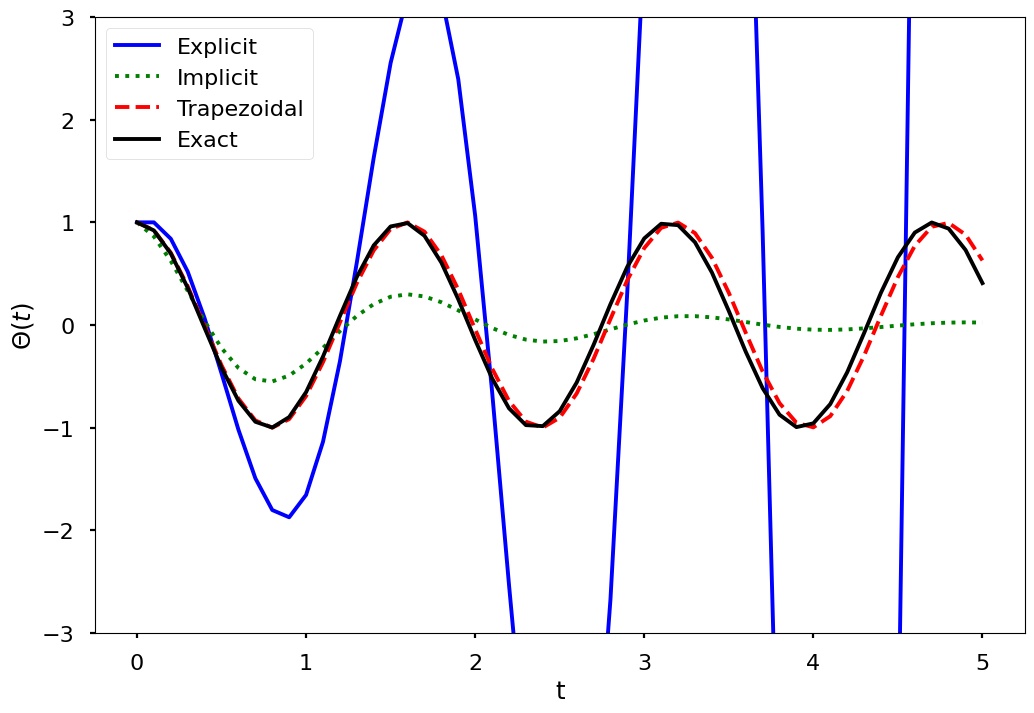

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

22.5 Predictor-Corrector Methods

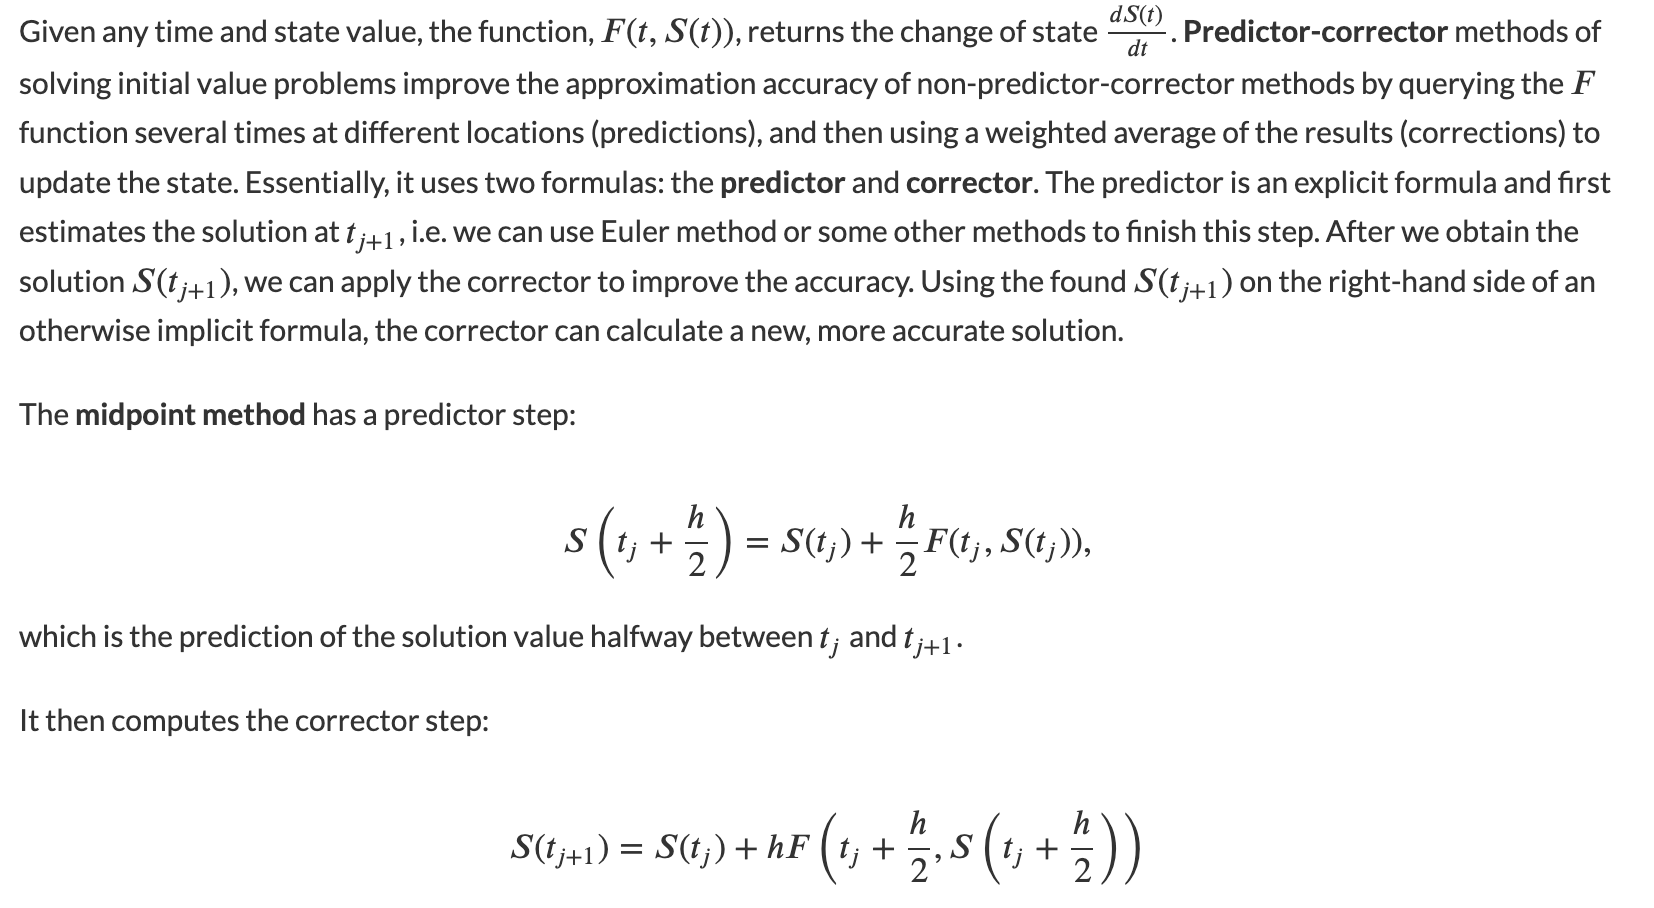

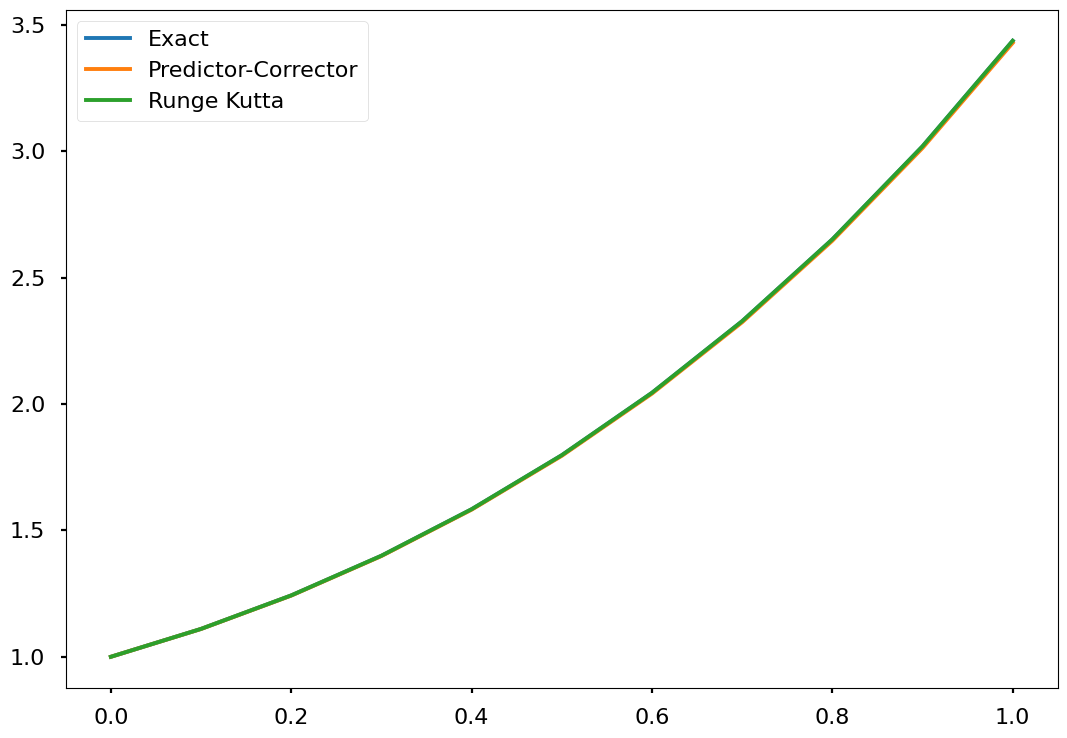

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

x0, y0 = 0, 1

h = 0.1
a, b = 0, 1
n = int((b-a)/h)

x_pc = [x0]
y_pc = [y0]

for i in range(n):
    x = x_pc[i] + h
    yp = y_pc[i] + h*f(x_pc[i], y_pc[i])
    yc = y_pc[i] + h*f(x, yp)
    y_pc.append((yp+yc)/2)
    x_pc.append(x)

x_rk = [x0]
y_rk = [y0]

for i in range(n):
    x = x_rk[i] + h
    k1 = h*f(x_rk[i], y_rk[i])
    k2 = h*f(x_rk[i] + h/2, y_rk[i] + k1/2)
    k3 = h*f(x_rk[i] + h/2, y_rk[i] + k2/2)
    k4 = h*f(x_rk[i] + h, y_rk[i] + k3)
    y_rk.append(y_rk[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    x_rk.append(x)
x = np.linspace(a, b, n+1)
y_exact = -x - 1 + 2*np.exp(x)

plt.plot(x, y_exact, label="Exact")
plt.plot(x_pc, y_pc, label="Predictor-Corrector")
plt.plot(x_rk, y_rk, label="Runge Kutta")
plt.legend()
plt.show()


22.6 Python ODE Solvers

<ipython-input-5-36bc703c66a3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


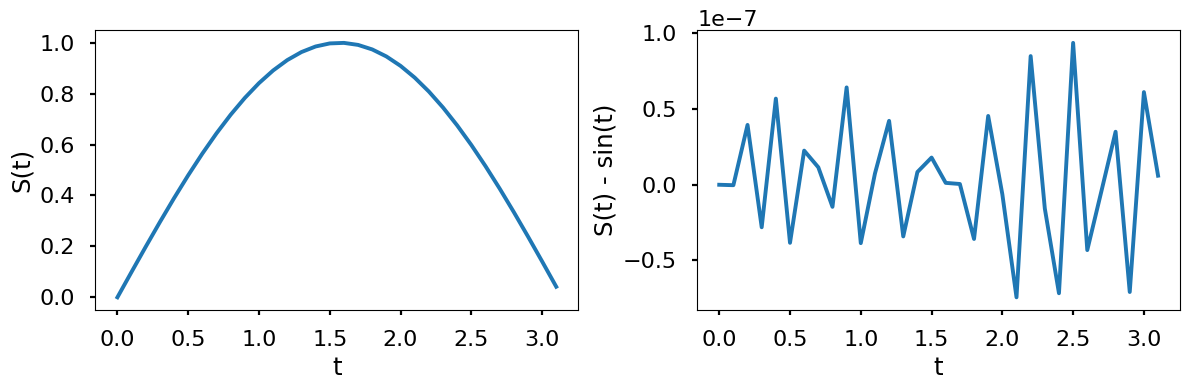

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()